### Linear Regression intro and details

- Linear regression examines the linear relationship between two (Simple Linear Regression ) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s)

-  Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too

- A relationship between variables Y and X is represented by this equation:

        Y = mX + b
        
- Y = Dependent variable — or the variable we are trying to predict or estimate
- X = Independnt vriable — the variable we are using to make predictions

- m is the slope of the regression line. It rpresent the effect X has on Y. If X increases by 1 unit, Y will increase by         exactly m units

- b is a constant, also known as the Y-intercept. If X equals 0, Y would be equal to b



### Simple Linear Reg 

- In SLR, the slope and Y-intercept derive from the data; 
- we don’t need the relationship between X and Y to be exactly linear. 
- SLR models also include the errors in the data (also known as residuals)
- Residuals =basically the differences between the true value of Y and the predicted/estimated value of Y

- Moto : Find "line of best fit" — the regression line where the errors would be minimal

- Goal : to minimize the mean squared error (MSE) or the sum of squares of error (SSE), also called the “residual sum of squares.” (RSS)


### Multiple Linear Reg

- In most cases, we will have more than one independent variable — we’ll have multiple variables

- it can be as little as two independent variables and up to hundreds (or theoretically even thousands) of variables. in those cases we will use a Multiple Linear Regression model (MLR). 

- The regression equation is pretty much the same as the simple regression equation, just with more variables:

  Y = b0 + b1X1 + b2X2

In [1]:
# Lets load dataset and continue

from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [2]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  

from sklearn.datasets import load_boston
BostonData = load_boston()
BosData = pd.DataFrame(BostonData.data)
BosData.columns = BostonData.feature_names
BosData['Price']=BostonData.target
BosData.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:

BosData.hist(column='Price',figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A72E07828>]],
      dtype=object)

In [4]:
# Importing necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
#import plotly
%matplotlib inline
#import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
BosData['Price'].skew()

1.1080984082549072

In [6]:

BosData['ln_Price'] = np.log(BosData['Price'])
BosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,ln_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,3.589059


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A72E077F0>]],
      dtype=object)

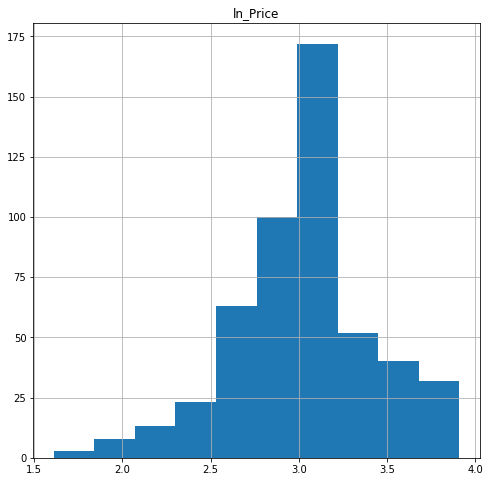

In [7]:

BosData.hist(column='ln_Price',figsize=(8,8))


In [8]:

BosData['ln_Price'].skew()

-0.33032129530987864

13


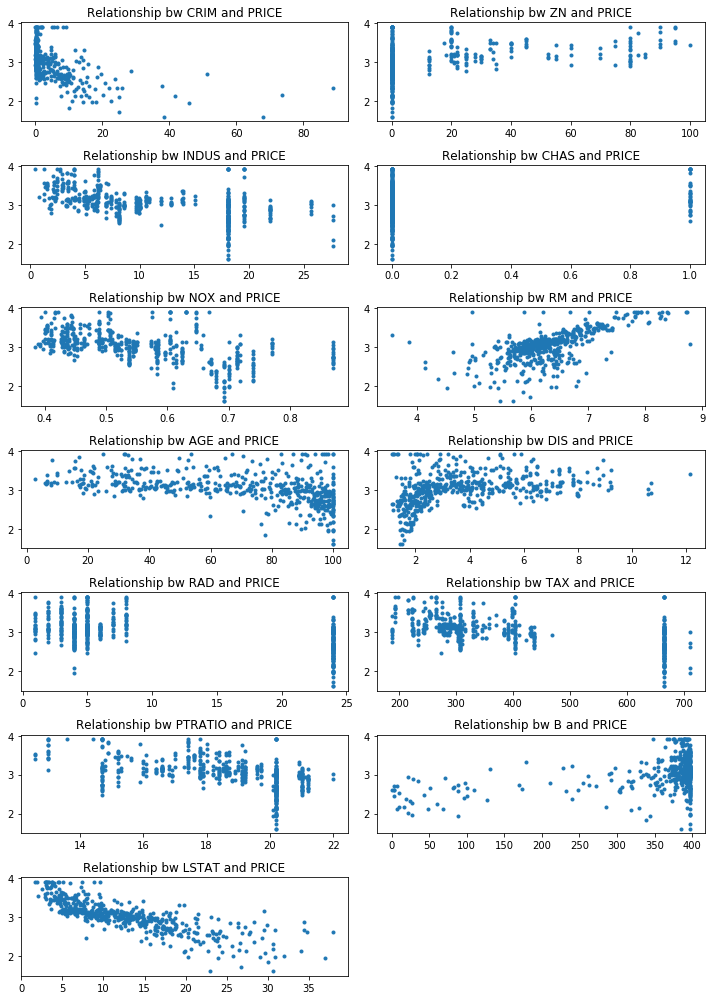

In [9]:
# Finding the relationship with Target

def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(BosData[col],BosData['ln_Price'],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and PRICE")

- We see Linear relationshit between RM and MEDV

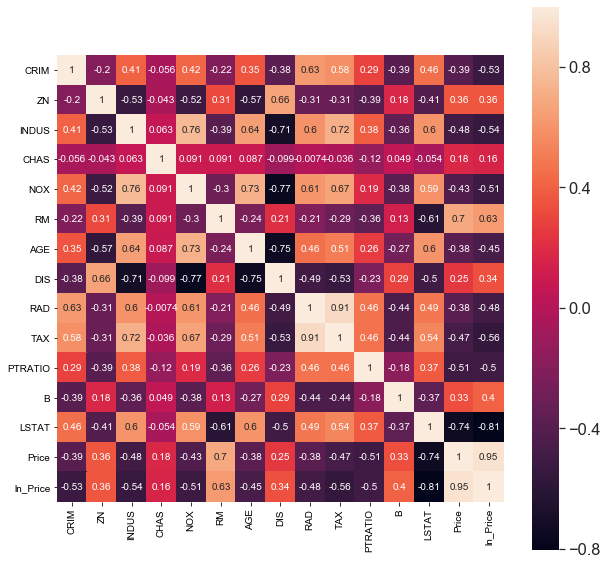

In [10]:
# Lets see if the features have high correlation amongst themselves - Another way
# Note - We can include Target in dataframe too to see overall relationship

import seaborn as sns

fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(BosData.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [11]:

from sklearn.model_selection import train_test_split

In [20]:
X = BosData[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',  'TAX','PTRATIO', 'B', 'LSTAT']]
Y = BosData['ln_Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

Gridsearch and Gradient Descent :
    
- Grid search is not used for tuning the parameters (only the hyperparameters), which are tuned with with gradient descend.

- Grid Search = Hyperparameter tuning
- Gradient Descent = Parameter tuning

- A parameter is something that changes during training; in a neural network, the only parameters are the weights and the biases, and they are tuned with gradient descend.

- A hyperparameter can be thought as something "structural", e.g. the number of layers, the number of nodes for each layer.



In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [22]:
linreg_model = linear_model.LinearRegression()

In [23]:
linreg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
pred_linmodel = linreg_model.predict(X_test)

In [25]:

metrics.r2_score(Y_test,pred_linmodel)

0.6637132462093709

In [18]:
#pred_linmodel

### Regularized Linear Regression

In [26]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [27]:
Lasso = linear_model.Lasso(alpha=0.01)
Lasso.fit(X1_train,Y1_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
pred1 = Lasso.predict(X1_test)
#Lasso.r2_score(X1_test,Y1_test)
metrics.r2_score(Y1_test,pred1)

0.6693288461944893

In [29]:

from sklearn.model_selection import GridSearchCV

In [30]:
params_Ridge = {'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])}

In [31]:
Ridge_GS = GridSearchCV(Lasso, param_grid=params_Ridge)
Ridge_GS.fit(X1_train,Y1_train)


C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\jharu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.683457343515988, tolerance: 0.004083040659337286
  positive)
C:\Users\jharu\

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
Ridge_GS.best_params_

{'alpha': 0.0}

In [33]:

pred_Ridge_GS = Ridge_GS.predict(X1_test)

In [34]:
metrics.r2_score(Y1_test,pred_Ridge_GS)

0.663713246209372